# <u>Heart Disease Detection

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

### Loading Dataset

In [2]:
heart_dataset = pd.read_csv("heart_dataset.csv")

In [3]:
# showing dataset
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Processing

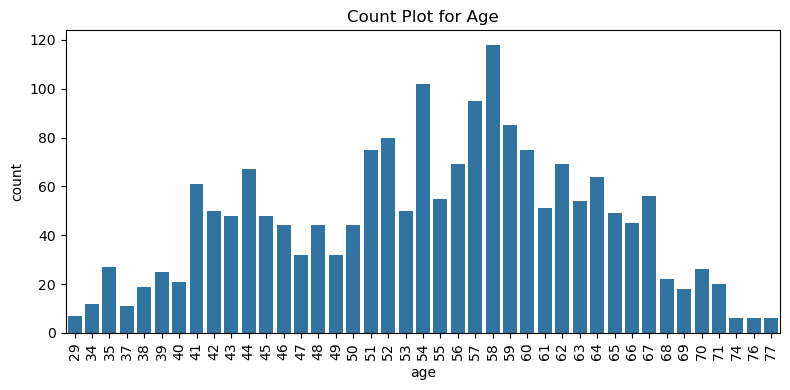

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(x=heart_dataset["age"])
plt.title("Count Plot for Age")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

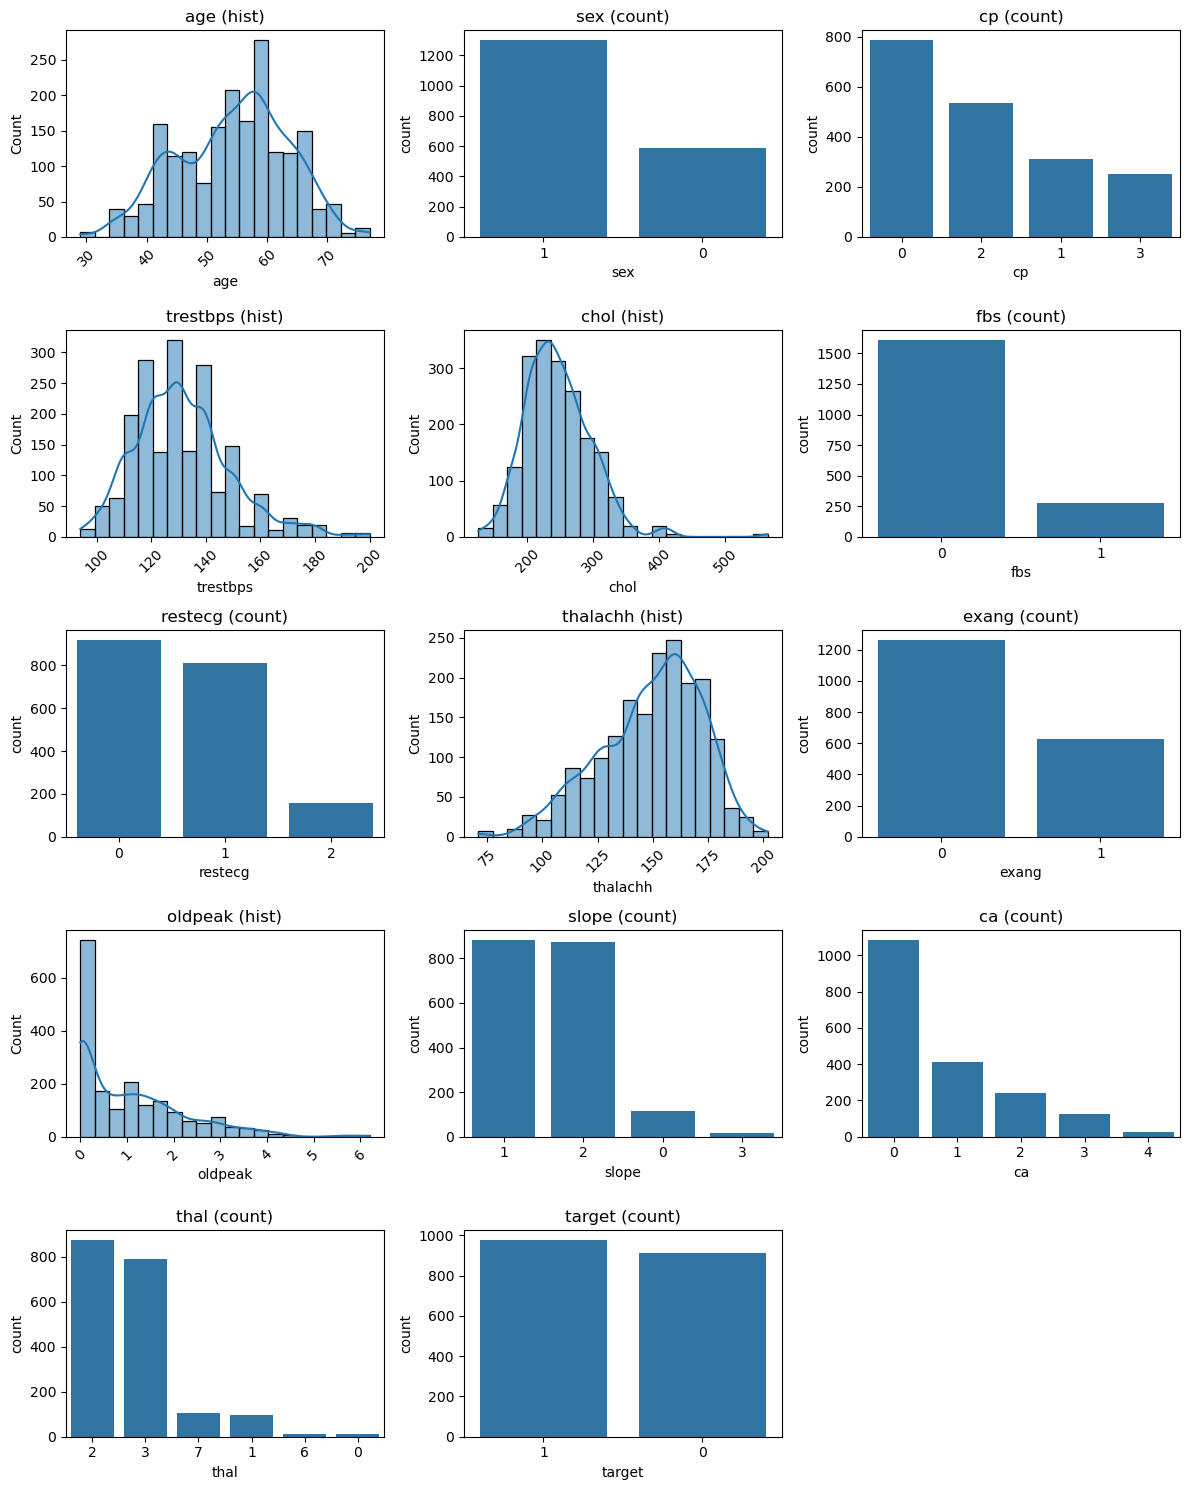

In [5]:
import math, matplotlib.pyplot as plt, seaborn as sns, pandas as pd
df = heart_dataset.copy()
cols = df.columns.tolist(); n = len(cols); ncols = 3
nrows = math.ceil(n/ncols); fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*3)); axs = axs.flatten()

for i,c in enumerate(cols):
    s = df[c].dropna(); ax = axs[i]
    if pd.api.types.is_numeric_dtype(s) and s.nunique()>15:
        sns.histplot(s, bins=20, kde=True, ax=ax); ax.set_title(f"{c} (hist)")
    else:
        sns.countplot(x=s, order=s.value_counts().index, ax=ax); ax.set_title(f"{c} (count)")
    if s.nunique()>6: ax.tick_params(axis='x', rotation=45)

for j in range(i+1, len(axs)): axs[j].axis('off')
plt.tight_layout(); plt.show()

In [6]:
# number of rows and columns
heart_dataset.shape

(1888, 14)

In [7]:
# check missing values
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# showing dataset information
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [9]:
# data distribution
heart_dataset["target"].value_counts()

target
1    977
0    911
Name: count, dtype: int64

In [10]:
# statistical measures of dataset
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.135593,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.103852,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [11]:
# correlation 
correlation = heart_dataset.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.104266,-0.042752,0.271607,0.221379,0.119464,-0.059987,-0.392916,0.092343,0.205371,-0.121312,0.283840,0.053396,-0.162303
sex,-0.104266,1.000000,-0.035520,-0.068685,-0.198892,0.032837,-0.031690,-0.053983,0.145680,0.092515,-0.020484,0.104863,0.168063,-0.196214
cp,-0.042752,-0.035520,1.000000,0.031046,-0.050474,0.060817,0.147336,0.198605,-0.269027,-0.109615,0.156571,-0.120645,0.243273,0.371258
trestbps,0.271607,-0.068685,0.031046,1.000000,0.136976,0.171784,-0.056821,-0.041222,0.067186,0.196181,-0.084387,0.098762,0.054935,-0.095875
chol,0.221379,-0.198892,-0.050474,0.136976,1.000000,0.024681,-0.062365,-0.021208,0.073496,0.058111,-0.009180,0.080456,0.063576,-0.071589
fbs,0.119464,0.032837,0.060817,0.171784,0.024681,1.000000,-0.054344,-0.000829,0.035332,0.000702,-0.045836,0.132365,-0.004210,-0.032491
restecg,-0.059987,-0.031690,0.147336,-0.056821,-0.062365,-0.054344,1.000000,0.021038,-0.029963,-0.016102,0.131779,-0.038458,0.174936,0.123289
thalachh,-0.392916,-0.053983,0.198605,-0.041222,-0.021208,-0.000829,0.021038,1.000000,-0.381478,-0.349612,0.277653,-0.215914,-0.100009,0.298795
exang,0.092343,0.145680,-0.269027,0.067186,0.073496,0.035332,-0.029963,-0.381478,1.000000,0.299862,-0.188768,0.117558,0.158651,-0.315084
oldpeak,0.205371,0.092515,-0.109615,0.196181,0.058111,0.000702,-0.016102,-0.349612,0.299862,1.000000,-0.408819,0.221370,0.160869,-0.315629


<Axes: >

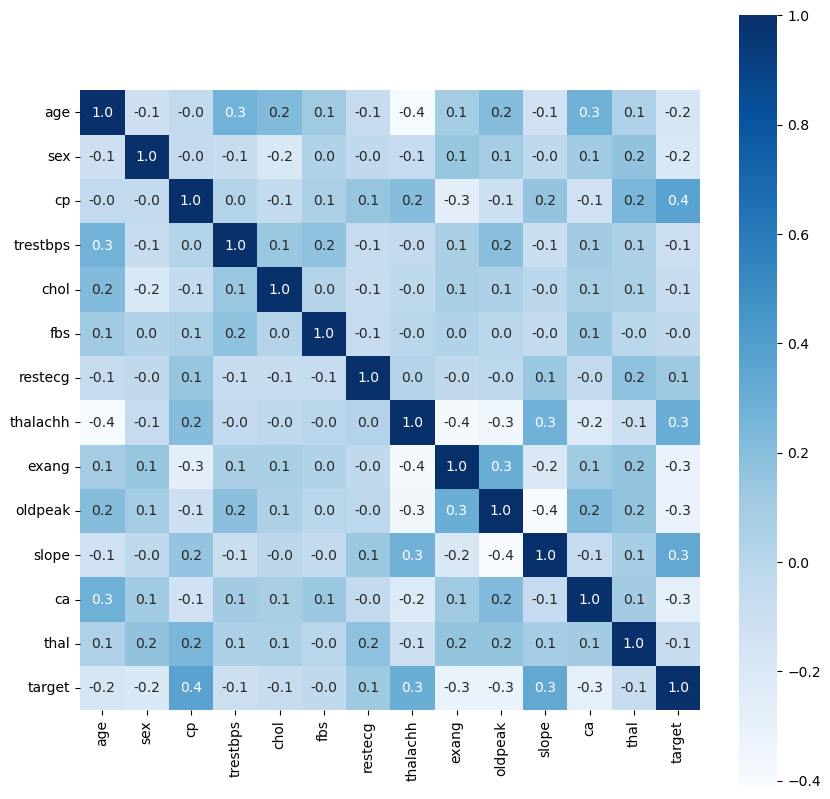

In [12]:
# visualise correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {"size": 10}, cmap = "Blues")

In [13]:
# separating features and target
X = heart_dataset.drop(["target"], axis = 1)
Y = heart_dataset["target"]

In [14]:
print(X)
print(Y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0      63    1   3       145   233    1        0       150      0      2.3   
1      37    1   2       130   250    0        1       187      0      3.5   
2      41    0   1       130   204    0        0       172      0      1.4   
3      56    1   1       120   236    0        1       178      0      0.8   
4      57    0   0       120   354    0        1       163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...       ...    ...      ...   
1883   60    1   0       140   207    0        0       138      1      1.9   
1884   46    1   0       140   311    0        1       120      1      1.8   
1885   59    1   3       134   204    0        1       162      0      0.8   
1886   54    1   1       154   232    0        0       164      0      0.0   
1887   53    1   0       110   335    0        1       143      1      3.0   

      slope  ca  thal  
0         0   0     1  
1         0   0

### Split, Train and Test data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [16]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (1888, 13)
Train data:  (1510, 13)
Test data:  (378, 13)


In [17]:
print(X_train)
print(Y_train)

      age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
354    57    0   0       140   241    0        1       123      1      0.2   
1141   51    1   3       125   213    0        0       125      1      1.4   
254    59    1   3       160   273    0        0       125      0      0.0   
717    59    1   3       170   288    0        0       159      0      0.2   
1292   71    0   1       160   302    0        1       162      0      0.4   
...   ...  ...  ..       ...   ...  ...      ...       ...    ...      ...   
304    53    1   0       140   203    1        0       155      1      3.1   
294    44    1   0       120   169    0        1       144      1      2.8   
1298   44    1   1       120   263    0        1       173      0      0.0   
241    59    0   0       174   249    0        1       143      1      0.0   
1272   52    1   1       120   325    0        1       172      0      0.2   

      slope  ca  thal  
354       1   0     3  
1141      2   1

## Training and Evaluation of Different Models

## 1. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_model = LogisticRegression(max_iter = 2000)

In [20]:
log_model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

In [21]:
# Accuracy on training data
X_train_prediction = log_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)

# Accuracy on test data
X_test_prediction = log_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data: ", test_data_accuracy)

print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, X_test_prediction))

Accuracy on training data:  0.7615894039735099
Accuracy on test data:  0.7380952380952381

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.64      0.70       182
           1       0.71      0.83      0.77       196

    accuracy                           0.74       378
   macro avg       0.75      0.73      0.73       378
weighted avg       0.74      0.74      0.74       378


Confusion Matrix:

[[116  66]
 [ 33 163]]


## 2. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)

In [24]:
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [25]:
# Accuracy on training data
X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)

# Accuracy on test data
X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data: ", test_data_accuracy)

print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, X_test_prediction))

Accuracy on training data:  1.0
Accuracy on test data:  0.9735449735449735

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       182
           1       0.96      0.98      0.97       196

    accuracy                           0.97       378
   macro avg       0.97      0.97      0.97       378
weighted avg       0.97      0.97      0.97       378


Confusion Matrix:

[[175   7]
 [  3 193]]


## 3. Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC

In [27]:
svm_model = SVC(kernel='rbf', probability=True)

In [28]:
svm_model.fit(X_train, Y_train)

SVC(probability=True)

In [29]:
# Accuracy on training data
X_train_prediction = svm_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)

# Accuracy on test data
X_test_prediction = svm_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data: ", test_data_accuracy)

print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, X_test_prediction))

Accuracy on training data:  0.6529801324503312
Accuracy on test data:  0.626984126984127

Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.49      0.56       182
           1       0.61      0.76      0.68       196

    accuracy                           0.63       378
   macro avg       0.63      0.62      0.62       378
weighted avg       0.63      0.63      0.62       378


Confusion Matrix:

[[ 89  93]
 [ 48 148]]


## 4. K-Nearest Neighbors (KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [32]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [33]:
# Accuracy on training data
X_train_prediction = knn_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy on training data: ", training_data_accuracy)

# Accuracy on test data
X_test_prediction = knn_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy on test data: ", test_data_accuracy)

print("\nClassification Report:\n")
print(classification_report(Y_test, X_test_prediction))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, X_test_prediction))

Accuracy on training data:  0.8549668874172185
Accuracy on test data:  0.7962962962962963

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       182
           1       0.79      0.83      0.81       196

    accuracy                           0.80       378
   macro avg       0.80      0.80      0.80       378
weighted avg       0.80      0.80      0.80       378


Confusion Matrix:

[[139  43]
 [ 34 162]]


### Compairing Models 

In [34]:
# Dictionary to store results
results = {}

models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "KNN": knn_model
}

for name, model in models.items():
    
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Store metrics
    results[name] = {
        "Train Accuracy": accuracy_score(Y_train, train_pred),
        "Test Accuracy": accuracy_score(Y_test, test_pred),
        "Precision": precision_score(Y_test, test_pred),
        "Recall": recall_score(Y_test, test_pred),
        "F1 Score": f1_score(Y_test, test_pred)
    }

# Convert to DataFrame
comparison_df = pd.DataFrame(results).T

# Round values for better display
comparison_df = comparison_df.round(3)

comparison_df

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.762,0.738,0.712,0.832,0.767
Random Forest,1.000,0.974,0.965,0.985,0.975
SVM,0.653,0.627,0.614,0.755,0.677
KNN,0.855,0.796,0.790,0.827,0.808


### Finalizing Model : Random Forest

In [35]:
print("After comparing multiple models, Random Forest clearly outperformed others.")
print("It achieved the highest Test Accuracy (97.4%), highest Recall (98.5%) and highest F1 Score (97.5%).")
print("\nTherefore, Random Forest is selected as the final model for Heart Disease Prediction.")

After comparing multiple models, Random Forest clearly outperformed others.
It achieved the highest Test Accuracy (97.4%), highest Recall (98.5%) and highest F1 Score (97.5%).

Therefore, Random Forest is selected as the final model for Heart Disease Prediction.


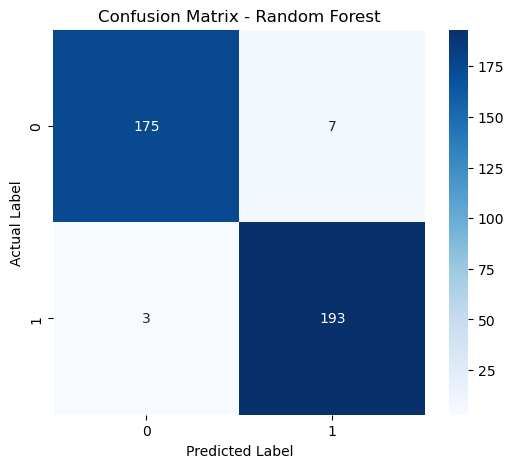

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
rf_predictions = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(Y_test, rf_predictions)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

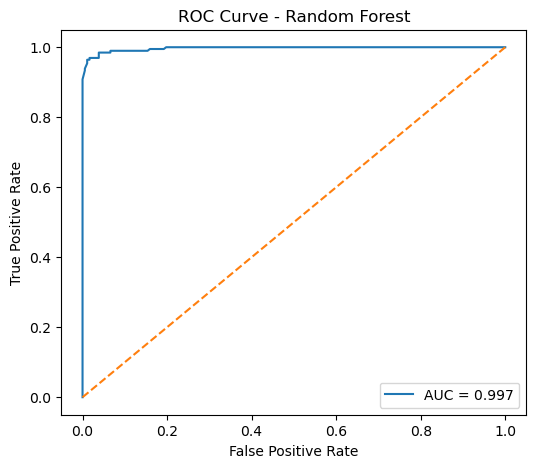

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(Y_test, rf_probabilities)

# AUC Score
auc_score = roc_auc_score(Y_test, rf_probabilities)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

### Predictive System

In [38]:
# taking a sample value for test
X_test.iloc[100].values

array([ 51.,   1.,   3., 140., 261.,   0.,   2., 186.,   1.,   0.,   1.,
         0.,   3.])

In [39]:
def check_heart_disease(sample_index):
    
    if sample_index >= len(X):
        print(f"Invalid index! Max allowed index is {len(X)-1}")
        return
    
    input_data = X.iloc[sample_index].values
    input_data_reshaped = input_data.reshape(1, -1)
    
    prediction = rf_model.predict(input_data_reshaped)[0]
    actual_label = Y.iloc[sample_index]
    
    print("="*40)
    print(f"Record Index: {sample_index}")
    print(f"Actual Label: {actual_label}")
    
    if prediction == 0:
        print("Model Prediction: NO Heart Disease")
    else:
        print("Model Prediction: Heart Disease Detected")
    
    print("="*40)

## Checking the result

In [40]:
check_heart_disease(1)

Record Index: 1
Actual Label: 1
Model Prediction: Heart Disease Detected


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
check_heart_disease(32)

Record Index: 32
Actual Label: 1
Model Prediction: Heart Disease Detected


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [42]:
check_heart_disease(188)

Record Index: 188
Actual Label: 0
Model Prediction: NO Heart Disease


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [43]:
check_heart_disease(18800)

Invalid index! Max allowed index is 1887
